In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest

from sklearn.decomposition import PCA, KernelPCA

In [31]:
data = np.load('./feature_vector_v1.npy')

In [32]:
data.shape

(11076, 22)

In [33]:
# data = MinMaxScaler().fit_transform(data)
data = StandardScaler().fit_transform(data)

In [34]:
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data)

In [35]:
data_tsne.shape

(11076, 2)

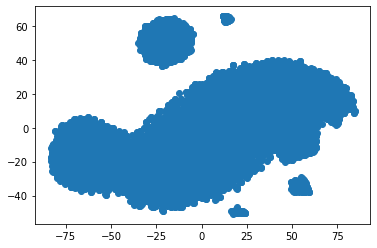

In [36]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

In [37]:
# pca = PCA(n_components=8)
pca = KernelPCA(n_components=8, kernel='rbf', gamma=0.1)
data = pca.fit_transform(data)

In [38]:
model = DBSCAN(eps=0.3, min_samples=30).fit(data)
labels_1 = model.labels_

51
[[ 2.80424477e-01  1.27310804e-01  1.32532980e-01 -5.52790765e-03
   5.97136577e-01 -4.74017849e-02  8.80188838e-03  6.49784740e-02]
 [ 2.36387565e-01  2.30545880e-01  1.14438506e-01  3.77114274e-02
   5.59560425e-01 -2.75441485e-02 -5.02357291e-02  8.28237352e-02]
 [ 1.72134743e-01  1.69889701e-01  2.71079408e-01 -1.36697087e-01
   4.29439708e-01  4.47622134e-03  1.12504885e-01  1.59522492e-02]
 [ 2.41176269e-01  2.49595605e-01  2.40937568e-01 -3.98465776e-02
   5.28835617e-01  2.12409243e-02 -5.91883678e-02 -3.73619996e-02]
 [ 1.58000207e-01 -2.80988361e-03 -1.42307026e-03 -6.05163597e-03
   6.29761263e-01  3.30407699e-02 -6.36798221e-02 -1.76594388e-02]
 [ 1.16551453e-01 -9.49843816e-02 -4.46553036e-02  1.11395203e-02
   6.27445780e-01  1.73820003e-02  3.93608221e-02  1.39203540e-01]
 [ 1.37093361e-01 -2.01209873e-01 -8.15946693e-03  4.24028909e-02
   6.14630718e-01 -3.46013898e-02 -5.80987268e-02  1.11291150e-01]
 [ 3.34757301e-01  1.05829564e-01  4.90499025e-01 -2.50751883e-01


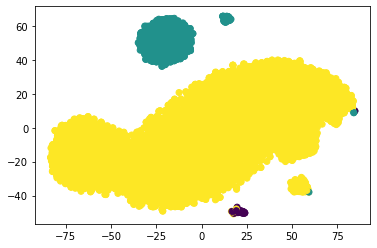

In [39]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_1)
outliers_1 = data[labels_1 == -1]
print(len(outliers_1))
print(outliers_1)

In [40]:
model = IsolationForest(max_samples=100).fit(data)
labels_2 = model.predict(data)

1533


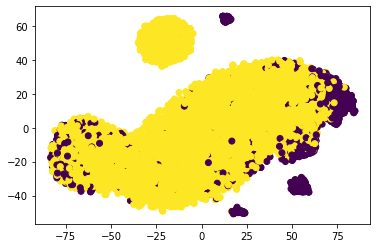

In [41]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_2)
outliers_2 = data[labels_2 == -1]
print(len(outliers_2))

- 如果用standard scaler不降维直接跑DBSCAN，所有的点都被检测成了outlier
- minmax scaler可视化效果不好，比较杂乱